# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [3]:
def f(x):
    f=numpy.cos(x)
    return f;

You can use the following cell to check that your code works for scalar arguments:

In [4]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [5]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [6]:
def df_analytic(x):
    df_analytic = -1*(numpy.sin(x))
    return df_analytic;

In [7]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [8]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [9]:
def backward_difference(f, x, dx):
    backward_difference = (f(x)-f(x-dx))/dx
    return backward_difference;

In [10]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


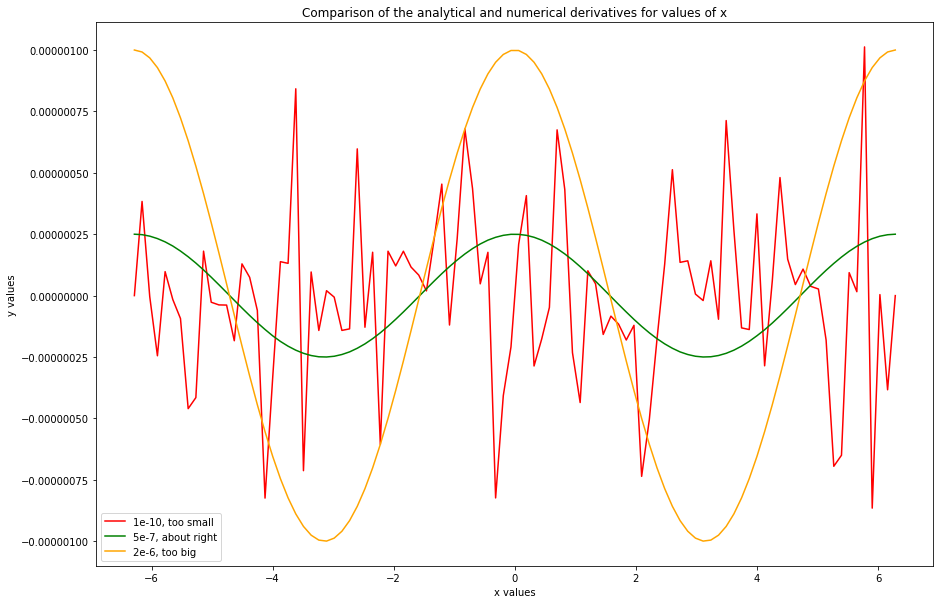

In [27]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-10)
df_dx_2 = backward_difference(f, xs, dx=5e-7)
df_dx_3 = backward_difference(f, xs, dx=2e-6)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(15, 10))
plt.title("Comparison of the analytical and numerical derivatives for values of x")
plt.xlabel("x values")
plt.ylabel("y values")
small = plt.plot(xs, df_dx_1 - df_dx_analytical, label = '1e-10, too small', color = 'red')
right = plt.plot(xs, df_dx_2 - df_dx_analytical, label = '5e-7, about right', color = 'green')
big = plt.plot(xs, df_dx_3 - df_dx_analytical, label = '2e-6, too big', color = 'orange')
plt.legend()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


In the case where $\Delta x$ is too small: computers will only store numbers with a finite precision (in the form $\pm n \cdot 2^e$ where $1\leqslant n \leqslant 2$). When the float(s) are used in a calculation, some of this precision may be lost as the result of the calculation is stored with the same precision as previously. If the calculation then requires the same level of precision for the result as previously, the computer may have to make up some digits of the number to be used. This is why the "too small" graph appears so erratic.

In the case $\Delta x$ is too large: the numerical method loses accuracy as the backward difference provides values closer to  true value of the derivative the closer $\Delta x$ is to 0. 